In [1]:
#! /usr/bin/python3
# author : Priyanshu Shrivastav (from IIT Palakkad, India)

import numpy as np, matplotlib.pyplot as plt
import csv, sys
from sklearn.preprocessing import MinMaxScaler

DATA_SIZE       = 10000
FEATURE_COUNT   = 4
TRAIN_DATA_SET  = "Dataset Question2.csv"
ALPHA           = 0.1

train_sz, test_sz, loss = 0, 0, []
X = np.ndarray((DATA_SIZE, FEATURE_COUNT + 1)) # +1 for bias
Y = np.zeros(DATA_SIZE, dtype=int)
W = np.ndarray(FEATURE_COUNT + 1)
min_max_scaler = MinMaxScaler()

class Perceptron:
# Take training input data
    def take_training_input(self):
        global train_sz, DATA_SIZE, test_sz
        train_sz = 0
        with open(TRAIN_DATA_SET) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            for row in csv_reader:
                for p in range(FEATURE_COUNT):
                    X[train_sz][p] = float(row[p])
                X[train_sz][FEATURE_COUNT] = 1.0
                Y[train_sz] = int(row[FEATURE_COUNT])
                if Y[train_sz] == 0:
                    Y[train_sz] = -1
                train_sz += 1
        DATA_SIZE = train_sz
        train_sz = int(DATA_SIZE * 0.8) # for training data set 8:2
        test_sz = DATA_SIZE - train_sz

    def scale_input(self):
        global X, min_max_scaler
        X = min_max_scaler.fit_transform(X)

# plot training data data
    def show_data(self, title, xlab="", ylab=""):
        print('=== Data points given to train : {sz} ==='.format(sz=train_sz))
        plt.title(title)
        plt.xlabel(xlab)
        plt.ylabel(ylab)
        for train_data_index in range(train_sz):
            if (Y[train_data_index] == 1):
                plt.plot(X[train_data_index][0], X[train_data_index][1], 'bo')
            else:
                plt.plot(X[train_data_index][0], X[train_data_index][1], 'ro')

# find weights
    def find_weights(self):
        global train_sz, W, loss
        print("================================       TRAINING       ==================================")
        print("Training data size : {tz}".format(tz=train_sz))
        W = np.random.random(FEATURE_COUNT + 1)
        ok = False
        epoch, err = 0, 0
        while ok is False:
            err = 0
            if epoch > 500: # limits on epoch
                break
            W_old, x_add = np.copy(W), []
            epoch += 1
            ok = True
            for tc in range(train_sz):
                y_hat, y_real = float(np.dot(W, X[tc].T)), Y[tc]
                if (y_hat > 0 and y_real < 0):
                    W = np.add(W, -1*ALPHA * X[tc].T)
                    ok = False
                    err += 1
                elif (y_hat < 0 and y_real > 0):
                    W = np.add(W, ALPHA * X[tc].T)
                    ok = False
                    err += 1
            loss.append(err)

            err_pos, err_neg, tp, tn = 0, 0, 0, 0
            for tc in range(train_sz):
                y_hat, y_real = float(np.dot(W, X[tc].T)), Y[tc]
                if (y_hat > 0 and y_real < 0):
                    err_neg += 1
                elif (y_hat < 0 and y_real > 0):
                    err_pos += 1
                elif (y_real > 0):
                    tp += 1
                elif (y_real < 0):
                    tn += 1

            print("----------------------------------------------------------------------------------------")
            print("[ Epoch : {epoch}, Error : {err} ]".format(epoch=epoch, err=err))
            print("W_old : {w_old}".format(w_old=W_old))
            print("W_new : {w_new}".format(w_new=W))
            print("True positive : {tp}, False positive : {fp}".format(tp=tp, fp=err_neg))
            print("True negative : {tn}, False negative : {fn}".format(tn=tn, fn=err_pos))

    def test(self):
        global test_sz, X, Y, loss, W, DATA_SIZE, train_sz

        print("================================       TESTING        ==================================")
        print("Total Data size: ", DATA_SIZE, ", Test Data size : ", test_sz)
        loss, err_pos, err_neg, tp, tn = [], 0, 0, 0, 0
        for tc in range(DATA_SIZE - test_sz, DATA_SIZE):
            y_hat, y_real = float(np.dot(W, X[tc].T)), Y[tc]
            if (y_hat > 0 and y_real < 0):
                err_neg += 1
            elif (y_hat < 0 and y_real > 0):
                err_pos += 1
            elif (y_real > 0):
                tp += 1
            elif (y_real < 0):
                tn += 1
        print("True positive : {tp}, False positive : {fp}".format(tp=tp, fp=err_neg))
        print("True negative : {tn}, False negative : {fn}".format(tn=tn, fn=err_pos))
        print("============================         TESTING FINISHED          =========================")

    def draw_error_count(self, title, sz):
        global loss
        ep = [epoch + 1 for epoch in range(len(loss))]
        accuracy = [sz - x for x in loss]
        plt.title(title + " : Classification Error v/s iterations")
        plt.ylabel("Classification Error")
        plt.xlabel("Iterations")
        plt.plot(ep, loss, 'r')
        plt.show()

        plt.title(title + " : Classification Accuracy v/s iterations")
        plt.ylabel("Classification Accuracy")
        plt.xlabel("Iterations")
        plt.plot(ep, accuracy, 'b')
        plt.show()


In [2]:
t = Perceptron()
t.take_training_input()


In [3]:
t.find_weights()

================================       TRAINING       ==================================
Training data size : 1097
----------------------------------------------------------------------------------------
[ Epoch : 1, Error : 71 ]
W_old : [0.22398143 0.71292887 0.9327343  0.57482656 0.19278657]
W_new : [-3.11003957 -2.34069893 -1.6806987  -0.82996164  2.69278657]
True positive : 473, False positive : 12
True negative : 590, False negative : 22
----------------------------------------------------------------------------------------
[ Epoch : 2, Error : 31 ]
W_old : [-3.11003957 -2.34069893 -1.6806987  -0.82996164  2.69278657]
W_new : [-3.54924357 -2.24922093 -2.5328377  -0.49881124  3.59278657]
True positive : 490, False positive : 6
True negative : 596, False negative : 5
----------------------------------------------------------------------------------------
[ Epoch : 3, Error : 24 ]
W_old : [-3.54924357 -2.24922093 -2.5328377  -0.49881124  3.59278657]
W_new : [-4.08769157 -2.18526293 

----------------------------------------------------------------------------------------
[ Epoch : 37, Error : 14 ]
W_old : [-8.59827857 -4.78934653 -5.5622467  -1.36351264  8.99278657]
W_new : [-8.36883257 -5.25469653 -6.0790367  -0.83135134  8.79278657]
True positive : 492, False positive : 6
True negative : 596, False negative : 3
----------------------------------------------------------------------------------------
[ Epoch : 38, Error : 14 ]
W_old : [-8.36883257 -5.25469653 -6.0790367  -0.83135134  8.79278657]
W_new : [-8.45568657 -5.51437753 -5.9555567  -0.50438534  8.99278657]
True positive : 488, False positive : 6
True negative : 596, False negative : 7
----------------------------------------------------------------------------------------
[ Epoch : 39, Error : 13 ]
W_old : [-8.45568657 -5.51437753 -5.9555567  -0.50438534  8.99278657]
W_new : [-8.76871057 -5.62112753 -5.4046467  -1.25769634  9.09278657]
True positive : 487, False positive : 7
True negative : 595, False negat

----------------------------------------------------------------------------------------
[ Epoch : 67, Error : 13 ]
W_old : [-10.48885657  -6.01551553  -7.5247167   -1.97831664  10.39278657]
W_new : [-10.17825057  -6.71014553  -7.7670867   -1.78283464  10.29278657]
True positive : 494, False positive : 6
True negative : 596, False negative : 1
----------------------------------------------------------------------------------------
[ Epoch : 68, Error : 14 ]
W_old : [-10.17825057  -6.71014553  -7.7670867   -1.78283464  10.29278657]
W_new : [-10.26250457  -6.62776553  -7.9929567   -1.38688634  10.29278657]
True positive : 489, False positive : 6
True negative : 596, False negative : 6
----------------------------------------------------------------------------------------
[ Epoch : 69, Error : 15 ]
W_old : [-10.26250457  -6.62776553  -7.9929567   -1.38688634  10.29278657]
W_new : [-10.28630857  -6.66063553  -7.9733667   -1.33395304  10.39278657]
True positive : 490, False positive : 6
Tr

----------------------------------------------------------------------------------------
[ Epoch : 111, Error : 15 ]
W_old : [-12.44968957  -7.80552353  -9.4619567   -1.74323864  12.39278657]
W_new : [-12.42737357  -7.77880353  -9.4658467   -1.71267534  12.49278657]
True positive : 490, False positive : 6
True negative : 596, False negative : 5
----------------------------------------------------------------------------------------
[ Epoch : 112, Error : 15 ]
W_old : [-12.42737357  -7.77880353  -9.4658467   -1.71267534  12.49278657]
W_new : [-12.40505757  -7.75208353  -9.4697367   -1.68211204  12.59278657]
True positive : 489, False positive : 6
True negative : 596, False negative : 6
----------------------------------------------------------------------------------------
[ Epoch : 113, Error : 15 ]
W_old : [-12.40505757  -7.75208353  -9.4697367   -1.68211204  12.59278657]
W_new : [-12.38274157  -7.72536353  -9.4736267   -1.65154874  12.69278657]
True positive : 489, False positive : 6

----------------------------------------------------------------------------------------
[ Epoch : 143, Error : 15 ]
W_old : [-13.11864157  -7.83532353  -9.6679667   -1.64987714  13.69278657]
W_new : [-13.09632557  -7.80860353  -9.6718567   -1.61931384  13.79278657]
True positive : 492, False positive : 6
True negative : 596, False negative : 3
----------------------------------------------------------------------------------------
[ Epoch : 144, Error : 13 ]
W_old : [-13.09632557  -7.80860353  -9.6718567   -1.61931384  13.79278657]
W_new : [-13.55822957  -7.22317353  -9.3112467   -1.86328054  13.89278657]
True positive : 493, False positive : 10
True negative : 592, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 145, Error : 13 ]
W_old : [-13.55822957  -7.22317353  -9.3112467   -1.86328054  13.89278657]
W_new : [-13.20150357  -7.85821353  -9.5770967   -1.69016854  13.79278657]
True positive : 493, False positive : 

----------------------------------------------------------------------------------------
[ Epoch : 178, Error : 15 ]
W_old : [-14.07986057  -8.38011353 -10.3893867   -1.52585994  14.39278657]
W_new : [-14.05754457  -8.35339353 -10.3932767   -1.49529664  14.49278657]
True positive : 490, False positive : 6
True negative : 596, False negative : 5
----------------------------------------------------------------------------------------
[ Epoch : 179, Error : 15 ]
W_old : [-14.05754457  -8.35339353 -10.3932767   -1.49529664  14.49278657]
W_new : [-14.03522857  -8.32667353 -10.3971667   -1.46473334  14.59278657]
True positive : 489, False positive : 6
True negative : 596, False negative : 6
----------------------------------------------------------------------------------------
[ Epoch : 180, Error : 15 ]
W_old : [-14.03522857  -8.32667353 -10.3971667   -1.46473334  14.59278657]
W_new : [-14.01291257  -8.29995353 -10.4010567   -1.43417004  14.69278657]
True positive : 488, False positive : 6

----------------------------------------------------------------------------------------
[ Epoch : 217, Error : 15 ]
W_old : [-14.90856657  -9.26046353 -11.2088267   -2.05343684  15.29278657]
W_new : [-14.88625057  -9.23374353 -11.2127167   -2.02287354  15.39278657]
True positive : 492, False positive : 6
True negative : 596, False negative : 3
----------------------------------------------------------------------------------------
[ Epoch : 218, Error : 13 ]
W_old : [-14.88625057  -9.23374353 -11.2127167   -2.02287354  15.39278657]
W_new : [-15.34815457  -8.64831353 -10.8521067   -2.26684024  15.49278657]
True positive : 493, False positive : 7
True negative : 595, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 219, Error : 10 ]
W_old : [-15.34815457  -8.64831353 -10.8521067   -2.26684024  15.49278657]
W_new : [-15.56092857  -8.42728353 -11.0458667   -1.96588824  15.29278657]
True positive : 486, False positive : 4

----------------------------------------------------------------------------------------
[ Epoch : 253, Error : 15 ]
W_old : [-15.78134257  -9.13558353 -11.3522367   -1.83947004  16.39278657]
W_new : [-15.75902657  -9.10886353 -11.3561267   -1.80890674  16.49278657]
True positive : 492, False positive : 6
True negative : 596, False negative : 3
----------------------------------------------------------------------------------------
[ Epoch : 254, Error : 13 ]
W_old : [-15.75902657  -9.10886353 -11.3561267   -1.80890674  16.49278657]
W_new : [-16.00291057  -9.45420353 -10.6108867   -2.23997774  16.59278657]
True positive : 490, False positive : 6
True negative : 596, False negative : 5
----------------------------------------------------------------------------------------
[ Epoch : 255, Error : 10 ]
W_old : [-16.00291057  -9.45420353 -10.6108867   -2.23997774  16.59278657]
W_new : [-16.31087457  -9.72753353 -10.3092267   -2.14669774  16.39278657]
True positive : 489, False positive : 6

----------------------------------------------------------------------------------------
[ Epoch : 279, Error : 11 ]
W_old : [-16.36993657  -8.95200353 -12.0278567   -2.40863454  16.59278657]
W_new : [-16.48105057  -8.98219353 -11.9477167   -2.58880254  16.49278657]
True positive : 483, False positive : 7
True negative : 595, False negative : 12
----------------------------------------------------------------------------------------
[ Epoch : 280, Error : 11 ]
W_old : [-16.48105057  -8.98219353 -11.9477167   -2.58880254  16.49278657]
W_new : [-16.86425457  -9.02251353 -11.8258767   -2.38022054  16.19278657]
True positive : 488, False positive : 7
True negative : 595, False negative : 7
----------------------------------------------------------------------------------------
[ Epoch : 281, Error : 13 ]
W_old : [-16.86425457  -9.02251353 -11.8258767   -2.38022054  16.19278657]
W_new : [-16.50752857  -9.65755353 -12.0917267   -2.20710854  16.09278657]
True positive : 490, False positive : 

----------------------------------------------------------------------------------------
[ Epoch : 310, Error : 13 ]
W_old : [-16.81366157  -9.92565353 -12.4497867   -1.87390554  16.99278657]
W_new : [-17.27556557  -9.34022353 -12.0891767   -2.11787224  17.09278657]
True positive : 491, False positive : 4
True negative : 598, False negative : 4
----------------------------------------------------------------------------------------
[ Epoch : 311, Error : 13 ]
W_old : [-17.27556557  -9.34022353 -12.0891767   -2.11787224  17.09278657]
W_new : [-16.91883957  -9.97526353 -12.3550267   -1.94476024  16.99278657]
True positive : 492, False positive : 6
True negative : 596, False negative : 3
----------------------------------------------------------------------------------------
[ Epoch : 312, Error : 15 ]
W_old : [-16.91883957  -9.97526353 -12.3550267   -1.94476024  16.99278657]
W_new : [-16.89652357  -9.94854353 -12.3589167   -1.91419694  17.09278657]
True positive : 492, False positive : 6

----------------------------------------------------------------------------------------
[ Epoch : 346, Error : 13 ]
W_old : [-17.91317557  -9.70146353 -12.4994367   -2.32359464  17.69278657]
W_new : [-17.55644957 -10.33650353 -12.7652867   -2.15048264  17.59278657]
True positive : 492, False positive : 6
True negative : 596, False negative : 3
----------------------------------------------------------------------------------------
[ Epoch : 347, Error : 15 ]
W_old : [-17.55644957 -10.33650353 -12.7652867   -2.15048264  17.59278657]
W_new : [-17.53413357 -10.30978353 -12.7691767   -2.11991934  17.69278657]
True positive : 492, False positive : 6
True negative : 596, False negative : 3
----------------------------------------------------------------------------------------
[ Epoch : 348, Error : 15 ]
W_old : [-17.53413357 -10.30978353 -12.7691767   -2.11991934  17.69278657]
W_new : [-17.51181757 -10.28306353 -12.7730667   -2.08935604  17.79278657]
True positive : 492, False positive : 6

----------------------------------------------------------------------------------------
[ Epoch : 383, Error : 13 ]
W_old : [-17.87725457 -10.48313353 -13.0259767   -1.91600014  18.89278657]
W_new : [-18.33915857  -9.89770353 -12.6653667   -2.15996684  18.99278657]
True positive : 492, False positive : 10
True negative : 592, False negative : 3
----------------------------------------------------------------------------------------
[ Epoch : 384, Error : 10 ]
W_old : [-18.33915857  -9.89770353 -12.6653667   -2.15996684  18.99278657]
W_new : [-18.55193257  -9.67667353 -12.8591267   -1.85901484  18.79278657]
True positive : 487, False positive : 7
True negative : 595, False negative : 8
----------------------------------------------------------------------------------------
[ Epoch : 385, Error : 13 ]
W_old : [-18.55193257  -9.67667353 -12.8591267   -1.85901484  18.79278657]
W_new : [-18.19520657 -10.31171353 -13.1249767   -1.68590284  18.69278657]
True positive : 489, False positive : 

----------------------------------------------------------------------------------------
[ Epoch : 420, Error : 13 ]
W_old : [-19.00881257 -10.26864353 -13.2785467   -2.07468954  19.39278657]
W_new : [-18.65208657 -10.90368353 -13.5443967   -1.90157754  19.29278657]
True positive : 492, False positive : 6
True negative : 596, False negative : 3
----------------------------------------------------------------------------------------
[ Epoch : 421, Error : 15 ]
W_old : [-18.65208657 -10.90368353 -13.5443967   -1.90157754  19.29278657]
W_new : [-18.62977057 -10.87696353 -13.5482867   -1.87101424  19.39278657]
True positive : 492, False positive : 6
True negative : 596, False negative : 3
----------------------------------------------------------------------------------------
[ Epoch : 422, Error : 15 ]
W_old : [-18.62977057 -10.87696353 -13.5482867   -1.87101424  19.39278657]
W_new : [-18.60745457 -10.85024353 -13.5521767   -1.84045094  19.49278657]
True positive : 492, False positive : 6

----------------------------------------------------------------------------------------
[ Epoch : 446, Error : 15 ]
W_old : [-19.20160657 -11.32085353 -14.0197567   -2.13508934  19.39278657]
W_new : [-19.17929057 -11.29413353 -14.0236467   -2.10452604  19.49278657]
True positive : 492, False positive : 6
True negative : 596, False negative : 3
----------------------------------------------------------------------------------------
[ Epoch : 447, Error : 15 ]
W_old : [-19.17929057 -11.29413353 -14.0236467   -2.10452604  19.49278657]
W_new : [-19.15697457 -11.26741353 -14.0275367   -2.07396274  19.59278657]
True positive : 492, False positive : 6
True negative : 596, False negative : 3
----------------------------------------------------------------------------------------
[ Epoch : 448, Error : 15 ]
W_old : [-19.15697457 -11.26741353 -14.0275367   -2.07396274  19.59278657]
W_new : [-19.13465857 -11.24069353 -14.0314267   -2.04339944  19.69278657]
True positive : 491, False positive : 6

----------------------------------------------------------------------------------------
[ Epoch : 481, Error : 15 ]
W_old : [-19.87301657 -11.38431353 -14.2337567   -2.30634544  20.19278657]
W_new : [-19.85070057 -11.35759353 -14.2376467   -2.27578214  20.29278657]
True positive : 492, False positive : 6
True negative : 596, False negative : 3
----------------------------------------------------------------------------------------
[ Epoch : 482, Error : 13 ]
W_old : [-19.85070057 -11.35759353 -14.2376467   -2.27578214  20.29278657]
W_new : [-20.31260457 -10.77216353 -13.8770367   -2.51974884  20.39278657]
True positive : 492, False positive : 10
True negative : 592, False negative : 3
----------------------------------------------------------------------------------------
[ Epoch : 483, Error : 13 ]
W_old : [-20.31260457 -10.77216353 -13.8770367   -2.51974884  20.39278657]
W_new : [-19.91547857 -11.42334353 -14.1500867   -2.26388684  20.29278657]
True positive : 493, False positive : 

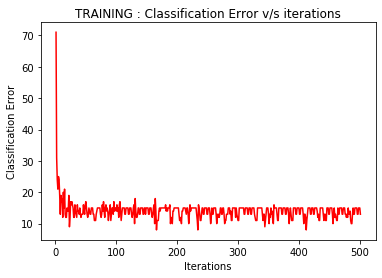

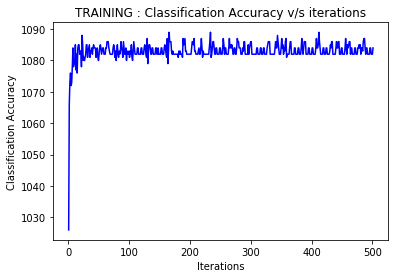

In [4]:
t.draw_error_count("TRAINING", train_sz)


In [5]:
t.test()


================================       TESTING        ==================================
Total Data size:  1372 , Test Data size :  275
True positive : 115, False positive : 6
True negative : 154, False negative : 0
============================         TESTING FINISHED          =========================


In [6]:
# Since the features were 4D, we cannot plot it.

In [7]:
# Lets try with MinMaxScaler()


In [8]:
t = Perceptron()
t.take_training_input()


In [9]:
t.scale_input() # Scaling the input data using MinMaxScaler()


In [10]:
t.find_weights()


================================       TRAINING       ==================================
Training data size : 1097
----------------------------------------------------------------------------------------
[ Epoch : 1, Error : 196 ]
W_old : [0.66173287 0.2361793  0.14554339 0.56065751 0.26745205]
W_new : [-0.67865477 -0.47069919 -0.51888499  0.16667752  0.66745205]
True positive : 486, False positive : 23
True negative : 579, False negative : 9
----------------------------------------------------------------------------------------
[ Epoch : 2, Error : 74 ]
W_old : [-0.67865477 -0.47069919 -0.51888499  0.16667752  0.66745205]
W_new : [-0.77081463 -0.66555888 -0.69630903  0.09192262  0.86745205]
True positive : 473, False positive : 0
True negative : 602, False negative : 22
----------------------------------------------------------------------------------------
[ Epoch : 3, Error : 76 ]
W_old : [-0.77081463 -0.66555888 -0.69630903  0.09192262  0.86745205]
W_new : [-0.86713613 -0.82336765

----------------------------------------------------------------------------------------
[ Epoch : 47, Error : 26 ]
W_old : [-1.60758124 -1.94224875 -1.90957251  0.04188768  2.46745205]
W_new : [-1.56193672 -1.95446764 -1.99693413  0.04869659  2.46745205]
True positive : 495, False positive : 20
True negative : 582, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 48, Error : 24 ]
W_old : [-1.56193672 -1.95446764 -1.99693413  0.04869659  2.46745205]
W_new : [-1.59188141 -1.93456822 -2.05007175  0.02473515  2.46745205]
True positive : 495, False positive : 13
True negative : 589, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 49, Error : 24 ]
W_old : [-1.59188141 -1.93456822 -2.05007175  0.02473515  2.46745205]
W_new : [-1.71569153 -1.92665475 -2.01853092 -0.00775074  2.46745205]
True positive : 491, False positive : 6
True negative : 596, False neg

----------------------------------------------------------------------------------------
[ Epoch : 78, Error : 20 ]
W_old : [-1.88866684 -2.23934915 -2.26184192  0.04054548  2.86745205]
W_new : [-1.87354673 -2.25607458 -2.30021511  0.04005237  2.86745205]
True positive : 495, False positive : 16
True negative : 586, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 79, Error : 22 ]
W_old : [-1.87354673 -2.25607458 -2.30021511  0.04005237  2.86745205]
W_new : [-1.86663415 -2.27800306 -2.33232815  0.06100574  2.86745205]
True positive : 495, False positive : 13
True negative : 589, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 80, Error : 22 ]
W_old : [-1.86663415 -2.27800306 -2.33232815  0.06100574  2.86745205]
W_new : [-1.87697778 -2.28038071 -2.3664495   0.06894261  2.86745205]
True positive : 495, False positive : 13
True negative : 589, False ne

----------------------------------------------------------------------------------------
[ Epoch : 116, Error : 19 ]
W_old : [-2.232914   -2.52367747 -2.56930439  0.15224343  3.26745205]
W_new : [-2.24770995 -2.54913575 -2.67957626  0.04778798  3.16745205]
True positive : 484, False positive : 3
True negative : 599, False negative : 11
----------------------------------------------------------------------------------------
[ Epoch : 117, Error : 15 ]
W_old : [-2.24770995 -2.54913575 -2.67957626  0.04778798  3.16745205]
W_new : [-2.20353382 -2.53873732 -2.61859132  0.06032141  3.26745205]
True positive : 495, False positive : 16
True negative : 586, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 118, Error : 18 ]
W_old : [-2.20353382 -2.53873732 -2.61859132  0.06032141  3.26745205]
W_new : [-2.18400271 -2.56595431 -2.64167943  0.0490816   3.26745205]
True positive : 495, False positive : 13
True negative : 589, False

----------------------------------------------------------------------------------------
[ Epoch : 145, Error : 20 ]
W_old : [-2.36358969 -2.78317007 -2.86638062  0.02378029  3.46745205]
W_new : [-2.37434184 -2.78842705 -2.87245984  0.03719685  3.46745205]
True positive : 491, False positive : 6
True negative : 596, False negative : 4
----------------------------------------------------------------------------------------
[ Epoch : 146, Error : 20 ]
W_old : [-2.37434184 -2.78842705 -2.87245984  0.03719685  3.46745205]
W_new : [-2.38509399 -2.79368402 -2.87853906  0.05061341  3.46745205]
True positive : 491, False positive : 6
True negative : 596, False negative : 4
----------------------------------------------------------------------------------------
[ Epoch : 147, Error : 20 ]
W_old : [-2.38509399 -2.79368402 -2.87853906  0.05061341  3.46745205]
W_new : [-2.41259149 -2.8140087  -2.85725589  0.06519357  3.46745205]
True positive : 490, False positive : 6
True negative : 596, False ne

----------------------------------------------------------------------------------------
[ Epoch : 170, Error : 18 ]
W_old : [-2.60206517 -2.87900438 -3.00734928  0.01549773  3.66745205]
W_new : [-2.61363387 -2.90714935 -2.99203819  0.01401678  3.66745205]
True positive : 487, False positive : 6
True negative : 596, False negative : 8
----------------------------------------------------------------------------------------
[ Epoch : 171, Error : 18 ]
W_old : [-2.61363387 -2.90714935 -2.99203819  0.01401678  3.66745205]
W_new : [-2.56822315 -2.92196883 -3.0333084  -0.00698231  3.66745205]
True positive : 486, False positive : 3
True negative : 599, False negative : 9
----------------------------------------------------------------------------------------
[ Epoch : 172, Error : 17 ]
W_old : [-2.56822315 -2.92196883 -3.0333084  -0.00698231  3.66745205]
W_new : [-2.50660043 -2.9128864  -2.99217053  0.02954914  3.76745205]
True positive : 495, False positive : 16
True negative : 586, False n

----------------------------------------------------------------------------------------
[ Epoch : 198, Error : 20 ]
W_old : [-2.70948918 -3.06565643 -3.22367293  0.05949152  3.86745205]
W_new : [-2.7016291  -3.03744099 -3.2761981   0.02709877  3.86745205]
True positive : 487, False positive : 3
True negative : 599, False negative : 8
----------------------------------------------------------------------------------------
[ Epoch : 199, Error : 18 ]
W_old : [-2.7016291  -3.03744099 -3.2761981   0.02709877  3.86745205]
W_new : [-2.72204116 -3.07296491 -3.24140912  0.03196664  3.86745205]
True positive : 485, False positive : 3
True negative : 599, False negative : 10
----------------------------------------------------------------------------------------
[ Epoch : 200, Error : 17 ]
W_old : [-2.72204116 -3.07296491 -3.24140912  0.03196664  3.86745205]
W_new : [-2.72111983 -3.05996439 -3.15392192  0.04509955  3.96745205]
True positive : 495, False positive : 16
True negative : 586, False 

----------------------------------------------------------------------------------------
[ Epoch : 230, Error : 18 ]
W_old : [-2.90675073 -3.21327084 -3.33260704  0.01457043  4.06745205]
W_new : [-2.86134    -3.22809032 -3.37387725 -0.00642867  4.06745205]
True positive : 486, False positive : 3
True negative : 599, False negative : 9
----------------------------------------------------------------------------------------
[ Epoch : 231, Error : 15 ]
W_old : [-2.86134    -3.22809032 -3.37387725 -0.00642867  4.06745205]
W_new : [-2.82766946 -3.19622822 -3.3271659   0.01147798  4.16745205]
True positive : 495, False positive : 16
True negative : 586, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 232, Error : 16 ]
W_old : [-2.82766946 -3.19622822 -3.3271659   0.01147798  4.16745205]
W_new : [-2.80791263 -3.25323226 -3.30705286 -0.01144892  4.16745205]
True positive : 494, False positive : 13
True negative : 589, False 

----------------------------------------------------------------------------------------
[ Epoch : 265, Error : 18 ]
W_old : [-3.00687243 -3.39982235 -3.49471383 -0.01810392  4.26745205]
W_new : [-2.9614617  -3.41464182 -3.53598404 -0.03910301  4.26745205]
True positive : 486, False positive : 3
True negative : 599, False negative : 9
----------------------------------------------------------------------------------------
[ Epoch : 266, Error : 15 ]
W_old : [-2.9614617  -3.41464182 -3.53598404 -0.03910301  4.26745205]
W_new : [-2.91728557 -3.40424339 -3.4749991  -0.02656958  4.36745205]
True positive : 494, False positive : 13
True negative : 589, False negative : 1
----------------------------------------------------------------------------------------
[ Epoch : 267, Error : 20 ]
W_old : [-2.91728557 -3.40424339 -3.4749991  -0.02656958  4.36745205]
W_new : [-2.92354184 -3.36237036 -3.53479572 -0.05180204  4.36745205]
True positive : 495, False positive : 13
True negative : 589, False 

----------------------------------------------------------------------------------------
[ Epoch : 309, Error : 22 ]
W_old : [-3.1074205  -3.49802087 -3.72940989 -0.01528106  4.56745205]
W_new : [-3.1258536  -3.54269849 -3.69808023  0.00682428  4.56745205]
True positive : 494, False positive : 9
True negative : 593, False negative : 1
----------------------------------------------------------------------------------------
[ Epoch : 310, Error : 16 ]
W_old : [-3.1258536  -3.54269849 -3.69808023  0.00682428  4.56745205]
W_new : [-3.11421834e+00 -3.49228468e+00 -3.77411439e+00  1.55629490e-03
  4.56745205e+00]
True positive : 494, False positive : 13
True negative : 589, False negative : 1
----------------------------------------------------------------------------------------
[ Epoch : 311, Error : 20 ]
W_old : [-3.11421834e+00 -3.49228468e+00 -3.77411439e+00  1.55629490e-03
  4.56745205e+00]
W_new : [-3.1137258  -3.52278477 -3.77572074  0.02416587  4.56745205]
True positive : 493, False

----------------------------------------------------------------------------------------
[ Epoch : 341, Error : 18 ]
W_old : [-3.31533171 -3.52334317 -3.90211754 -0.03628225  4.66745205]
W_new : [-3.33574377 -3.55886709 -3.86732856 -0.03141439  4.66745205]
True positive : 488, False positive : 3
True negative : 599, False negative : 7
----------------------------------------------------------------------------------------
[ Epoch : 342, Error : 14 ]
W_old : [-3.33574377 -3.55886709 -3.86732856 -0.03141439  4.66745205]
W_new : [-3.31979313 -3.57672196 -3.87107879 -0.06433627  4.66745205]
True positive : 485, False positive : 3
True negative : 599, False negative : 10
----------------------------------------------------------------------------------------
[ Epoch : 343, Error : 18 ]
W_old : [-3.31979313 -3.57672196 -3.87107879 -0.06433627  4.66745205]
W_new : [-3.30820034 -3.63807628 -3.8392536  -0.06357154  4.66745205]
True positive : 486, False positive : 3
True negative : 599, False n

----------------------------------------------------------------------------------------
[ Epoch : 378, Error : 14 ]
W_old : [-3.37699668 -3.77374531 -3.8847414   0.01642425  4.86745205]
W_new : [-3.34100118 -3.68305976 -4.00665606 -0.01662773  4.86745205]
True positive : 494, False positive : 9
True negative : 593, False negative : 1
----------------------------------------------------------------------------------------
[ Epoch : 379, Error : 14 ]
W_old : [-3.34100118 -3.68305976 -4.00665606 -0.01662773  4.86745205]
W_new : [-3.35159288 -3.72433753 -3.97143199 -0.01830978  4.86745205]
True positive : 493, False positive : 9
True negative : 593, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 380, Error : 14 ]
W_old : [-3.35159288 -3.72433753 -3.97143199 -0.01830978  4.86745205]
W_new : [-3.37221494 -3.73016046 -3.95616225 -0.04166009  4.86745205]
True positive : 492, False positive : 6
True negative : 596, False ne

----------------------------------------------------------------------------------------
[ Epoch : 416, Error : 16 ]
W_old : [-3.49565312 -3.74899719 -4.07702895 -0.04723916  4.96745205]
W_new : [-3.50646708 -3.75256621 -4.07657934  0.00896298  4.96745205]
True positive : 493, False positive : 9
True negative : 593, False negative : 2
----------------------------------------------------------------------------------------
[ Epoch : 417, Error : 14 ]
W_old : [-3.50646708 -3.75256621 -4.07657934  0.00896298  4.96745205]
W_new : [-3.52672063 -3.74627114 -4.0692679  -0.01054289  4.96745205]
True positive : 492, False positive : 6
True negative : 596, False negative : 3
----------------------------------------------------------------------------------------
[ Epoch : 418, Error : 16 ]
W_old : [-3.52672063 -3.74627114 -4.0692679  -0.01054289  4.96745205]
W_new : [-3.53091414e+00 -3.75387448e+00 -4.06650400e+00 -3.24543816e-04
  4.96745205e+00]
True positive : 492, False positive : 6
True neg

----------------------------------------------------------------------------------------
[ Epoch : 457, Error : 16 ]
W_old : [-3.57060665 -3.84263806 -4.15909904  0.02925123  5.06745205]
W_new : [-3.56549909 -3.85380323 -4.16018487  0.00769957  5.06745205]
True positive : 492, False positive : 6
True negative : 596, False negative : 3
----------------------------------------------------------------------------------------
[ Epoch : 458, Error : 14 ]
W_old : [-3.56549909 -3.85380323 -4.16018487  0.00769957  5.06745205]
W_new : [-3.58538774 -3.82818165 -4.16930629 -0.00685626  5.06745205]
True positive : 492, False positive : 6
True negative : 596, False negative : 3
----------------------------------------------------------------------------------------
[ Epoch : 459, Error : 16 ]
W_old : [-3.58538774 -3.82818165 -4.16930629 -0.00685626  5.06745205]
W_new : [-3.58958126e+00 -3.83578500e+00 -4.16654238e+00  3.36208157e-03
  5.06745205e+00]
True positive : 492, False positive : 6
True neg

----------------------------------------------------------------------------------------
[ Epoch : 486, Error : 14 ]
W_old : [-3.54234885 -3.93146113 -4.20688619 -0.06118784  5.16745205]
W_new : [-3.55817972 -3.96458539 -4.17394699 -0.00731382  5.16745205]
True positive : 494, False positive : 9
True negative : 593, False negative : 1
----------------------------------------------------------------------------------------
[ Epoch : 487, Error : 14 ]
W_old : [-3.55817972 -3.96458539 -4.17394699 -0.00731382  5.16745205]
W_new : [-3.55563437 -3.94839498 -4.19560318 -0.05439237  5.16745205]
True positive : 494, False positive : 6
True negative : 596, False negative : 1
----------------------------------------------------------------------------------------
[ Epoch : 488, Error : 14 ]
W_old : [-3.55563437 -3.94839498 -4.19560318 -0.05439237  5.16745205]
W_new : [-3.5657336  -3.95866192 -4.18306134 -0.00583228  5.16745205]
True positive : 494, False positive : 9
True negative : 593, False ne

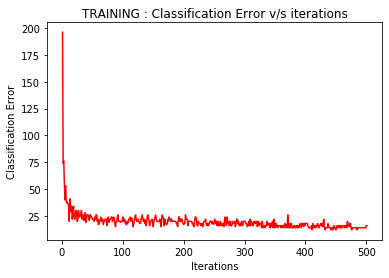

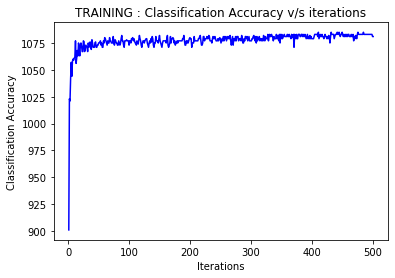

In [11]:
t.draw_error_count("TRAINING", train_sz)


In [12]:
t.test()


================================       TESTING        ==================================
Total Data size:  1372 , Test Data size :  275
True positive : 115, False positive : 4
True negative : 156, False negative : 0
============================         TESTING FINISHED          =========================


In [14]:
# Using the scaling helped in reduing 2 false positives, also from the curves it is clear that the 
# deviation of error was reduced when input data was scaled